In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from Solver import *
from functools import partial
import sys
sys.path.append('../Utility')
from Numerics import gradient_first,  gradient_first_c2f, gradient_first_f2c, interpolate_c2f, interpolate_f2c, psi_fft_sol, gradient_fft
import NeuralNet
import PlotDefault

In [ ]:
betas = [1, 2, 3]

physics_params, q_mean, psi_mean, dpv_mean,  mu_mean, mu_mean_clip,  closure_mean, yy, force = load_data(betas = [1, 2, 3])

# Load Model

In [5]:
TRAINING_TYPE = "direct" # indirect   indirect_res

if TRAINING_TYPE == "direct":
    trained_net = torch.load("direct.nn")
else:
    (save_folder, uki_iter) = ("indirect_NN" , 1) if TRAINING_TYPE=="direct" else ("indirect_NN_res" , 1)
 
    uki_obj = pickle.load( open( save_folder + "/ukiobj-" + str(N_iter-1) + ".dat", "rb" ) )
    trained_net = NeuralNet.create_net(ind, outd, layers, width, activation, initializer, outputlayer, uki_obj.theta_mean[-1])




print(trained_net.modus['LinM{}'.format(1)].weight)
print(trained_net.modus['LinM{}'.format(1)].bias)
print(trained_net.modus['LinMout'].weight)
print(trained_net.modus['LinMout'].bias)

Parameter containing:
tensor([[ -4.7859,   6.5052],
        [ -2.2770,   8.7097],
        [ -5.3667, -19.0528],
        [ -1.2197, -30.8893],
        [ -1.3276,  -3.8197],
        [ -8.0031,  -3.2137],
        [ -1.8663, -21.0461],
        [ -1.6865, -25.7356],
        [ -4.7691, -22.1724],
        [ -3.9954,  -2.4863],
        [ -1.9276,   5.4567],
        [ -3.7723,   9.9709],
        [ -0.0518, -25.0686],
        [ -5.4032, -16.4786],
        [ -2.2480, -18.4600],
        [  2.7187,  14.6655],
        [  1.6986, -12.4102],
        [ -0.5142, -21.5541],
        [ -2.6056, -12.5660],
        [ -8.1525,   2.4404]], requires_grad=True)
Parameter containing:
tensor([ 3.2009,  2.2054,  5.4634, -1.6429,  5.9813,  9.9734,  0.5220,  0.0226,
         4.3067,  6.6995,  3.4913,  3.4137, -2.6825,  5.1865,  1.1910, -2.5537,
         4.2288, -3.1069,  5.5108, 11.0422], requires_grad=True)
Parameter containing:
tensor([[ 0.6771,  3.8070,  1.5517,  2.6510,  1.5846,  1.6086,  1.6508,  2.1264,
       

# Direct Test

../Utility/NeuralNet.py:490: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu = net(torch.tensor(x, dtype=torch.float32)).detach().numpy().flatten()


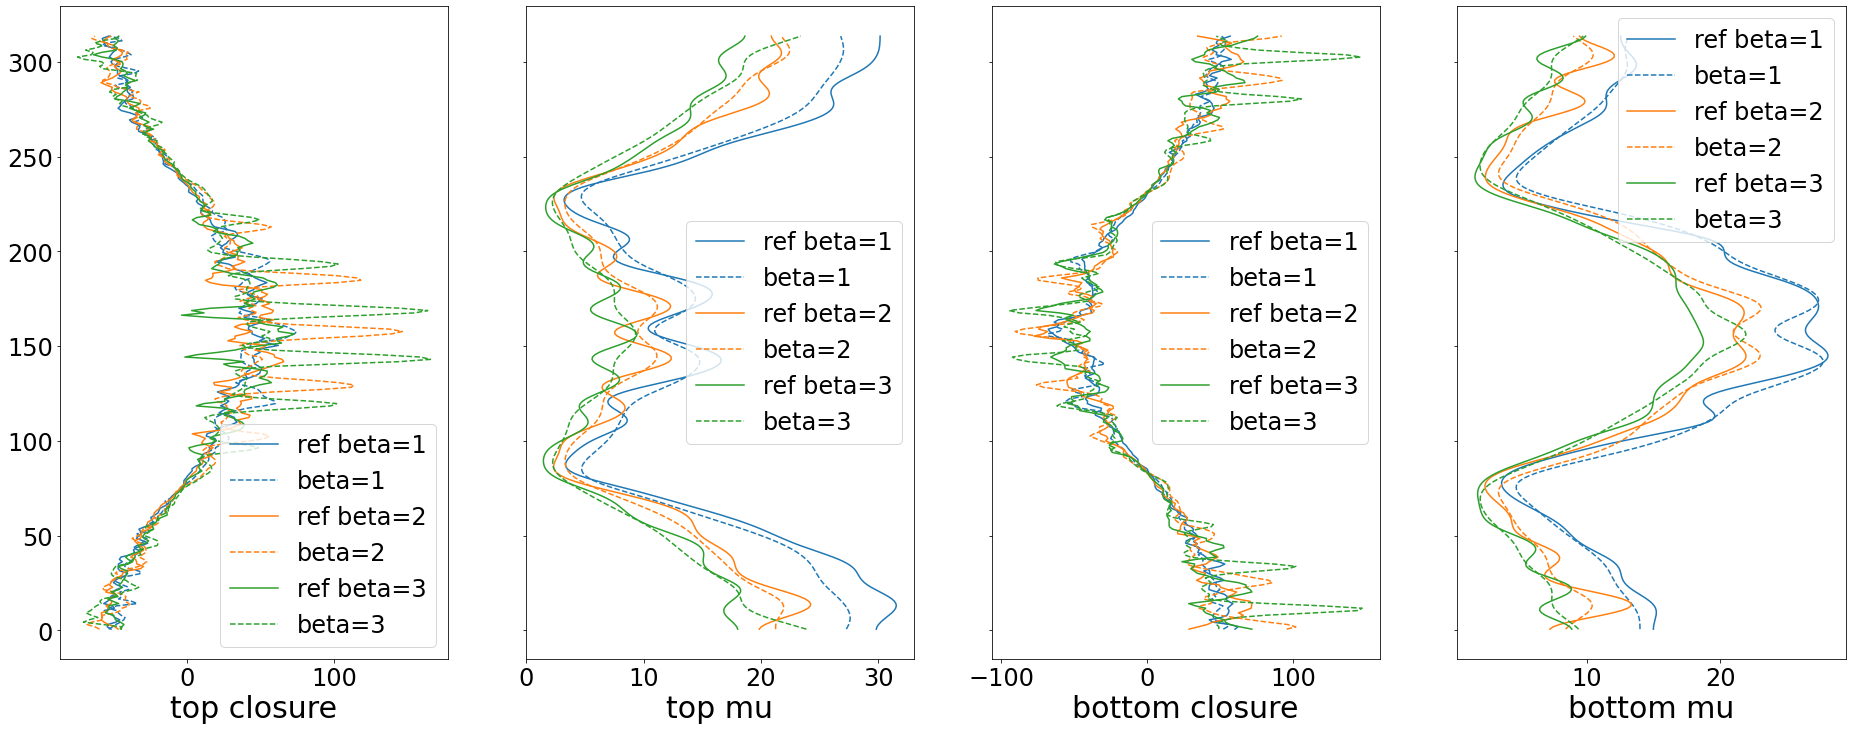

In [6]:
x_train = torch.from_numpy(np.stack((np.abs(q_mean).flatten()/q_scale, dpv_mean.flatten()/dpv_scale)).T.astype(np.float32)) 
mu_pred = NeuralNet.net_eval(x=x_train, net=trained_net, mu_scale = mu_scale, non_negative=non_negative, filter_on=filter_on, filter_sigma=filter_sigma, n_data=2*N_data).reshape((N_data, 2, Ny))



fig, ax = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=True, figsize=(32,12))
for i in range(N_data):
    ax[0].plot(closure_mean[i,0, :], yy, "-", color="C"+str(i), label="ref beta="+str(betas[i]))
    ax[1].plot(mu_mean_clip[i,0, :], yy, "-", color="C"+str(i), label="ref beta="+str(betas[i]))
    ax[2].plot(closure_mean[i,1, :], yy, "-", color="C"+str(i), label="ref beta="+str(betas[i]))
    ax[3].plot(mu_mean_clip[i,1, :], yy, "-", color="C"+str(i), label="ref beta="+str(betas[i]))
    
    
    ax[0].plot(mu_pred[i,0, :]*dpv_mean[i,0, :], yy, "--", color="C"+str(i), label="beta="+str(betas[i]))
    ax[1].plot(mu_pred[i,0, :], yy, "--", color="C"+str(i), label="beta="+str(betas[i]))
    ax[2].plot(mu_pred[i,1, :]*dpv_mean[i,1, :], yy, "--", color="C"+str(i), label="beta="+str(betas[i]))
    ax[3].plot(mu_pred[i,1, :], yy, "--", color="C"+str(i), label="beta="+str(betas[i]))
    
    
ax[0].set_xlabel("top closure")
ax[1].set_xlabel("top mu")
ax[2].set_xlabel("bottom closure")
ax[3].set_xlabel("bottom mu")

for i in range(4):
    ax[i].legend()

fig.savefig("QG-Training-" + TRAINING_TYPE + "-Direct-Test.png")

1000 max q 3.9021460729429287
2000 max q 7.718671492181548
3000 max q 11.443146995110421
4000 max q 15.092669865229492
5000 max q 18.653020058803744
6000 max q 22.12448409647813
7000 max q 25.511095273414252
8000 max q 28.813315092499188
9000 max q 32.032887518469806
10000 max q 35.17150993501531
11000 max q 38.230931933665005
12000 max q 41.21304143568509
13000 max q 44.11993041015981
14000 max q 46.953932620302645
15000 max q 49.7191742135749
16000 max q 52.41978008194968
17000 max q 55.056421473180265
18000 max q 57.63216956372341
19000 max q 60.150075259018756
20000 max q 62.6130470969221
21000 max q 65.02372088757988
22000 max q 67.3843305012273
23000 max q 69.6965881498473
24000 max q 71.96977803619454
25000 max q 74.19786469108399
26000 max q 76.3806160916095
27000 max q 78.51728225949178
28000 max q 80.60648820803729
29000 max q 82.64634936818636
30000 max q 84.64616445132799
31000 max q 86.59987955817094
32000 max q 88.50005918869995
33000 max q 90.34457058574692
34000 max q 9

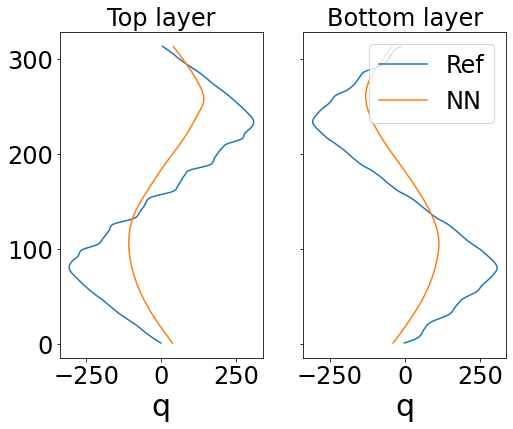

In [7]:
def Qg(params, trained_net, force):
    
#     beta  =params["beta"]
    
#     # reference
#     folder_name = "/central/groups/esm/dzhuang/pyqg_run/2layer/nx256beta" + str(beta) + "rek0p3/"
#     file_name = "nx256beta" + str(beta) + "rek0p3"
#     start, end, step = 500000, 1000000, 20000

#     flow_means_ref, _ = preprocess_data(folder_name, file_name, beta, dU, L, start, end, step)
#     mu_mean_ref, dpv_mean_ref, u_mean_ref, vor_mean_ref, q_mean_ref, psi_mean_ref, flux_mean_ref, psi_var_2_mean_ref = flow_means_ref[:8]

    
    dt = 4e-3
    save_every = 1000
    Nt = 1000000 
    
    Ny = force.shape[1]
    
    # q0 = np.copy(q_mean)
    q0 = np.zeros((2, Ny))
    yy, dy = np.linspace(L/(2*Ny), L - L/(2*Ny), Ny), L/Ny

    q0[0, :] = 1e-1 * np.sin(2*np.pi*yy/L)
    q0[1, :] = 1e-1 * np.cos(2*np.pi*yy/L)
    
    beta1 = beta2 = params.beta
    nn_model = partial(NeuralNet.nn_viscosity, net=trained_net, mu_scale = mu_scale, non_negative=non_negative, filter_on=filter_on, filter_sigma=filter_sigma)
    model = lambda q, psi, yy, res : nummodel_fft(nn_model, beta1, beta2,  q, psi, yy, res)
    yy, t_data, q_data = explicit_solve(model, force, q0, params, dt = dt, Nt = Nt, save_every = save_every)

    
    q_mean_pred = np.mean(q_data[Nt//(2*save_every):, :, :], axis=0)
    
    
    return yy, q_mean_pred

test_ind = 1
q_mean_ref = q_mean[test_ind, :, :]
# test with betas[test_ind]
params = QG_params(L=L, dU=dU, F1=F1, F2=F2, hyper_nu=hyper_nu, hyper_order=hyper_order, beta=betas[test_ind], mu=mu)


yy, q_mean_pred = Qg( params , trained_net)
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(8,6))


ax[0].plot(q_mean_ref[0, : ], yy,   label="Ref")                                                                         
ax[0].plot(q_mean_pred[0, : ], yy, label="NN")
ax[1].plot(q_mean_ref[1, : ] , yy,   label="Ref")                                                                         
ax[1].plot(q_mean_pred[1, : ], yy, label="NN")
ax[0].set_xlabel("q")
ax[1].set_xlabel("q")

ax[0].set_title("Top layer")
ax[1].set_title("Bottom layer")

plt.legend()
fig.savefig("QG-Training-" + TRAINING_TYPE + "-Indirect-Test.png")